## Module 3 Exercises

We will work with auto-mpg dataset in this exercises notebook. Most of the exercises will be similar to what you have seen in lab and practice notebooks. You may have to look up for a function or a concept to solve one or two problems in the notebook. But all questions are closed book questions which do not ask beyond what you learned in the class.

Load the data `/dsa/data/all_datasets/auto-mpg/auto-mpg.csv` into R and name the dataframe as `auto_data`

In [1]:
options(repr.plot.width=12, repr.plot.height=12)
library(tidyverse)

auto_data <- read.csv("/dsa/data/all_datasets/auto-mpg/auto-mpg.csv", header = TRUE, sep = ',')
head(auto_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [2]:
str(auto_data)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : chr  "130.0" "165.0" "150.0" "150.0" ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


**Question 1:** Display first 10 rows of data for columns mpg, horsepower and car.name

In [3]:
#Code for question 1 goes here
#---------------------------------
head(auto_data, 10)[c("mpg", "horsepower", "car.name")]

,mpg,horsepower,car.name
,<dbl>,<chr>,<chr>
1,18,130.0,chevrolet chevelle malibu
2,15,165.0,buick skylark 320
3,18,150.0,plymouth satellite
4,16,150.0,amc rebel sst
5,17,140.0,ford torino
6,15,198.0,ford galaxie 500
7,14,220.0,chevrolet impala
8,14,215.0,plymouth fury iii
9,14,225.0,pontiac catalina


**Question 2:** Use factor() function to convert the labels of origin column in auto_data from (1,2,3) to (america,europe and asia)

In [4]:
#Code for question 2 goes here
#---------------------------------
auto_data$origin <- factor(auto_data$origin, levels = c(1, 2, 3), labels = c("america", "europe", "asia"))
head(auto_data, 10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<fct>,<chr>
1,18,8,307,130.0,3504,12.0,70,america,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,america,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,america,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,america,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,america,ford torino
6,15,8,429,198.0,4341,10.0,70,america,ford galaxie 500
7,14,8,454,220.0,4354,9.0,70,america,chevrolet impala
8,14,8,440,215.0,4312,8.5,70,america,plymouth fury iii
9,14,8,455,225.0,4425,10.0,70,america,pontiac catalina


**Question 3:** Create a subset called mpg_data of auto_data to include rows which have mpg >= 12 and <= 15. Select columns cylinders, weight, acceleration, car.name to include in the subset. 

In [5]:
#Code for question 3 goes here
#---------------------------------
mpg_data <- subset(auto_data, mpg >= 12 & mpg <= 15) %>%
select(mpg, cylinders, weight, acceleration, car.name)

head(mpg_data)

,mpg,cylinders,weight,acceleration,car.name
,<dbl>,<int>,<int>,<dbl>,<chr>
2,15,8,3693,11.5,buick skylark 320
6,15,8,4341,10.0,ford galaxie 500
7,14,8,4354,9.0,chevrolet impala
8,14,8,4312,8.5,plymouth fury iii
9,14,8,4425,10.0,pontiac catalina
10,15,8,3850,8.5,amc ambassador dpl


**Question 4:** Create a two-way table called "cars_by_origin" for origin and cylinders columns of auto_data. Add rows and columns using addmargins() function.

In [6]:
#Code for question 4 goes here
#---------------------------------
cars_by_origin <- table(auto_data$origin, auto_data$cylinders)
#cars_by_origin
addmargins(cars_by_origin)

,3,4,5,6,8,Sum
america,0,72,0,74,103,249
europe,0,63,3,4,0,70
asia,4,69,0,6,0,79
Sum,4,204,3,84,103,398


**Question 5** Perform chi-squared test for origin and cylinders using the two way table "cars_by_origin" we created above. 

In [7]:
#Code for question 5 goes here
#---------------------------------
chisq.test(cars_by_origin)


Warning message in chisq.test(cars_by_origin):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  cars_by_origin
X-squared = 180.1, df = 8, p-value < 2.2e-16


**Question 6:** What conclusions can you draw from the chi-squared test?

**Question 7:** Use prop.table function on two way table "cars_by_origin" to find column wise proportion of cars in percentages. 

In [8]:
#Code for question 7 goes here
#---------------------------------
round(prop.table(cars_by_origin, 2), 4)

         
               3      4      5      6      8
  america 0.0000 0.3529 0.0000 0.8810 1.0000
  europe  0.0000 0.3088 1.0000 0.0476 0.0000
  asia    1.0000 0.3382 0.0000 0.0714 0.0000

**Question 8.a:** Create a subset from auto_data which includes columns of non factor type. Assign the result to a variable called "less_data"

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




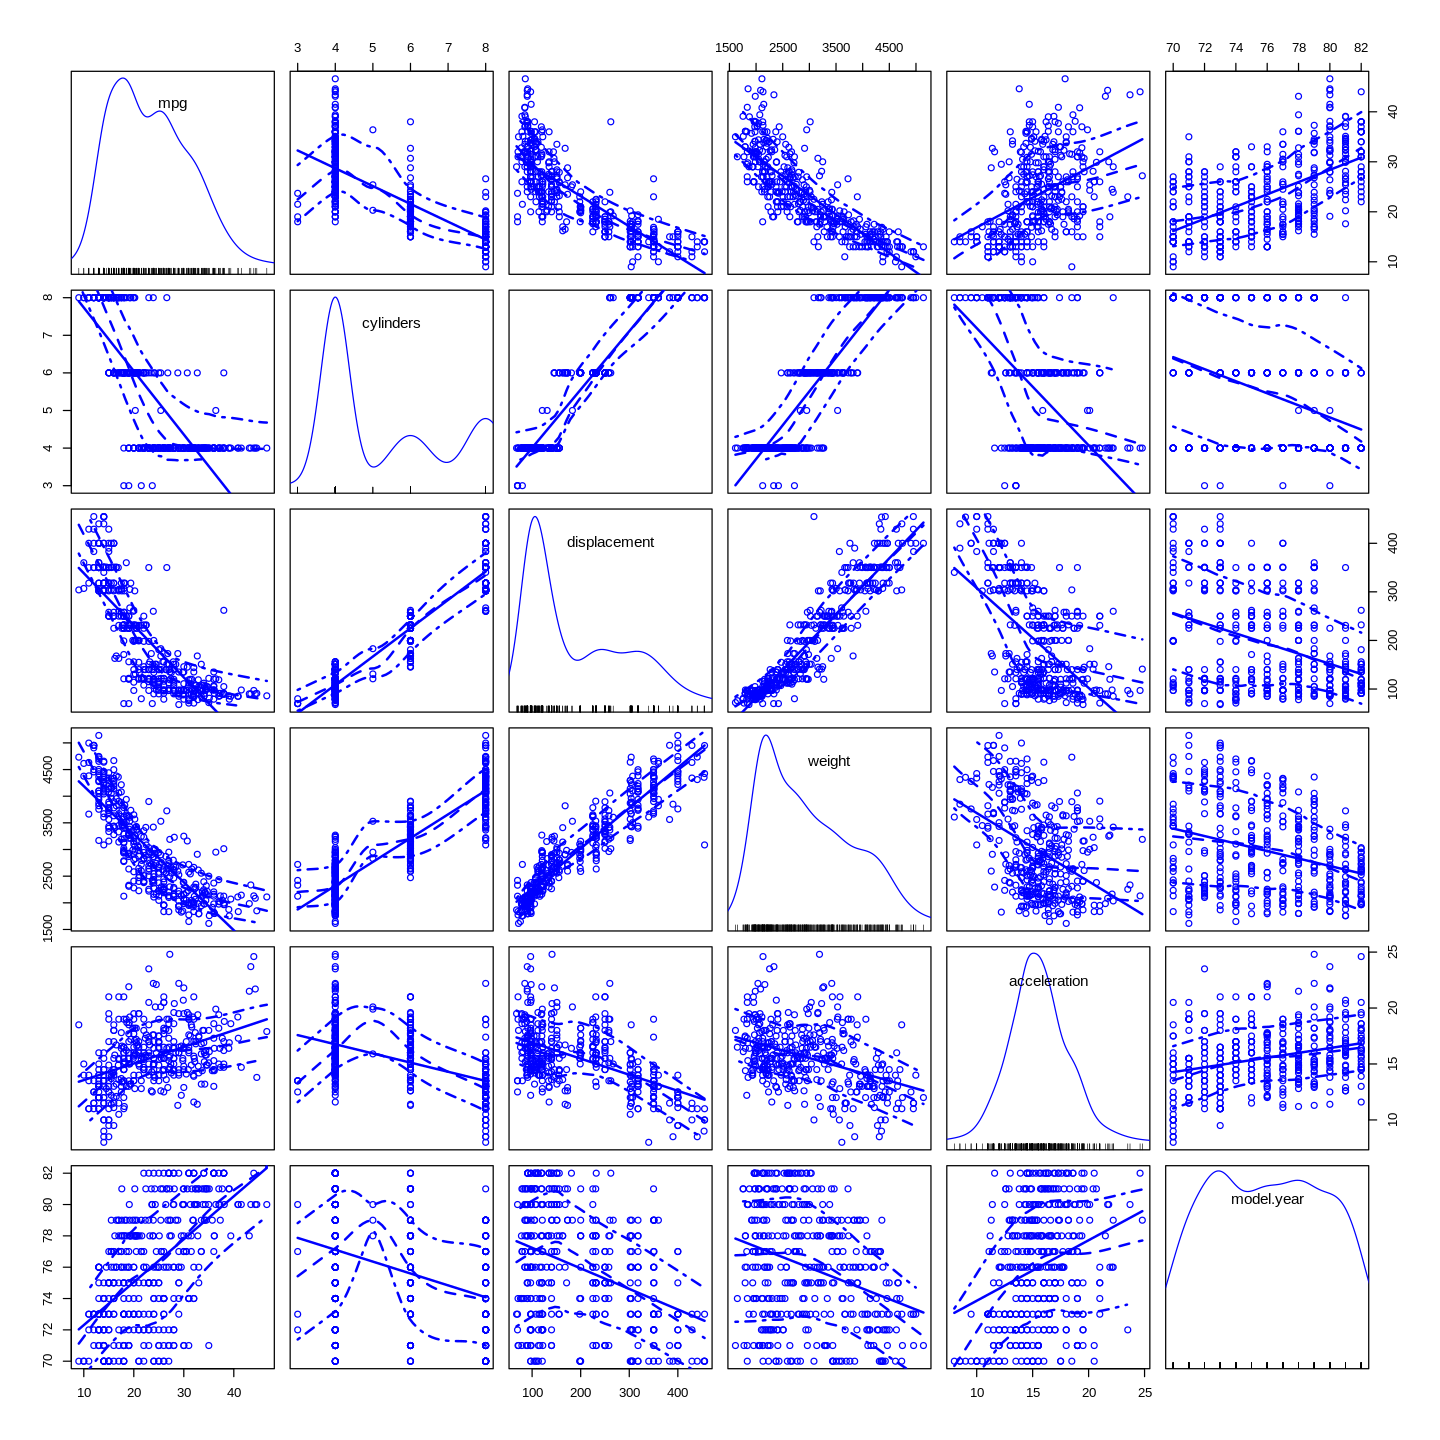

In [9]:
#Code for question 8.a goes here
#---------------------------------
less_data = auto_data[!sapply(auto_data, class) %in% c("factor", "character")]

library(car)
scatterplotMatrix(less_data)

**Question 8.b:** Find standard deviation of columns in less_data. Use apply() function to find standard deviation of all columns.

In [10]:
#Code for question 8.b goes here
#---------------------------------
apply(less_data, 2, sd)

mpg    cylinders displacement       weight acceleration   model.year 
    7.815984     1.701004   104.269838   846.841774     2.757689     3.697627

**Question 9:** What conclusions can you draw the results of questions 7, 8.a, and 8.b?

**Question 10.a:** Run princomp() function on less_data and assign the result to less_data_pca. Run summary() on the result.

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5
Standard deviation     1.8344315 0.9156363 0.8133488 0.3133600 0.1916781
Proportion of Variance 0.6730278 0.1676780 0.1323072 0.0196389 0.0073481
Cumulative Proportion  0.6730278 0.8407058 0.9730130 0.9926519 1.0000000

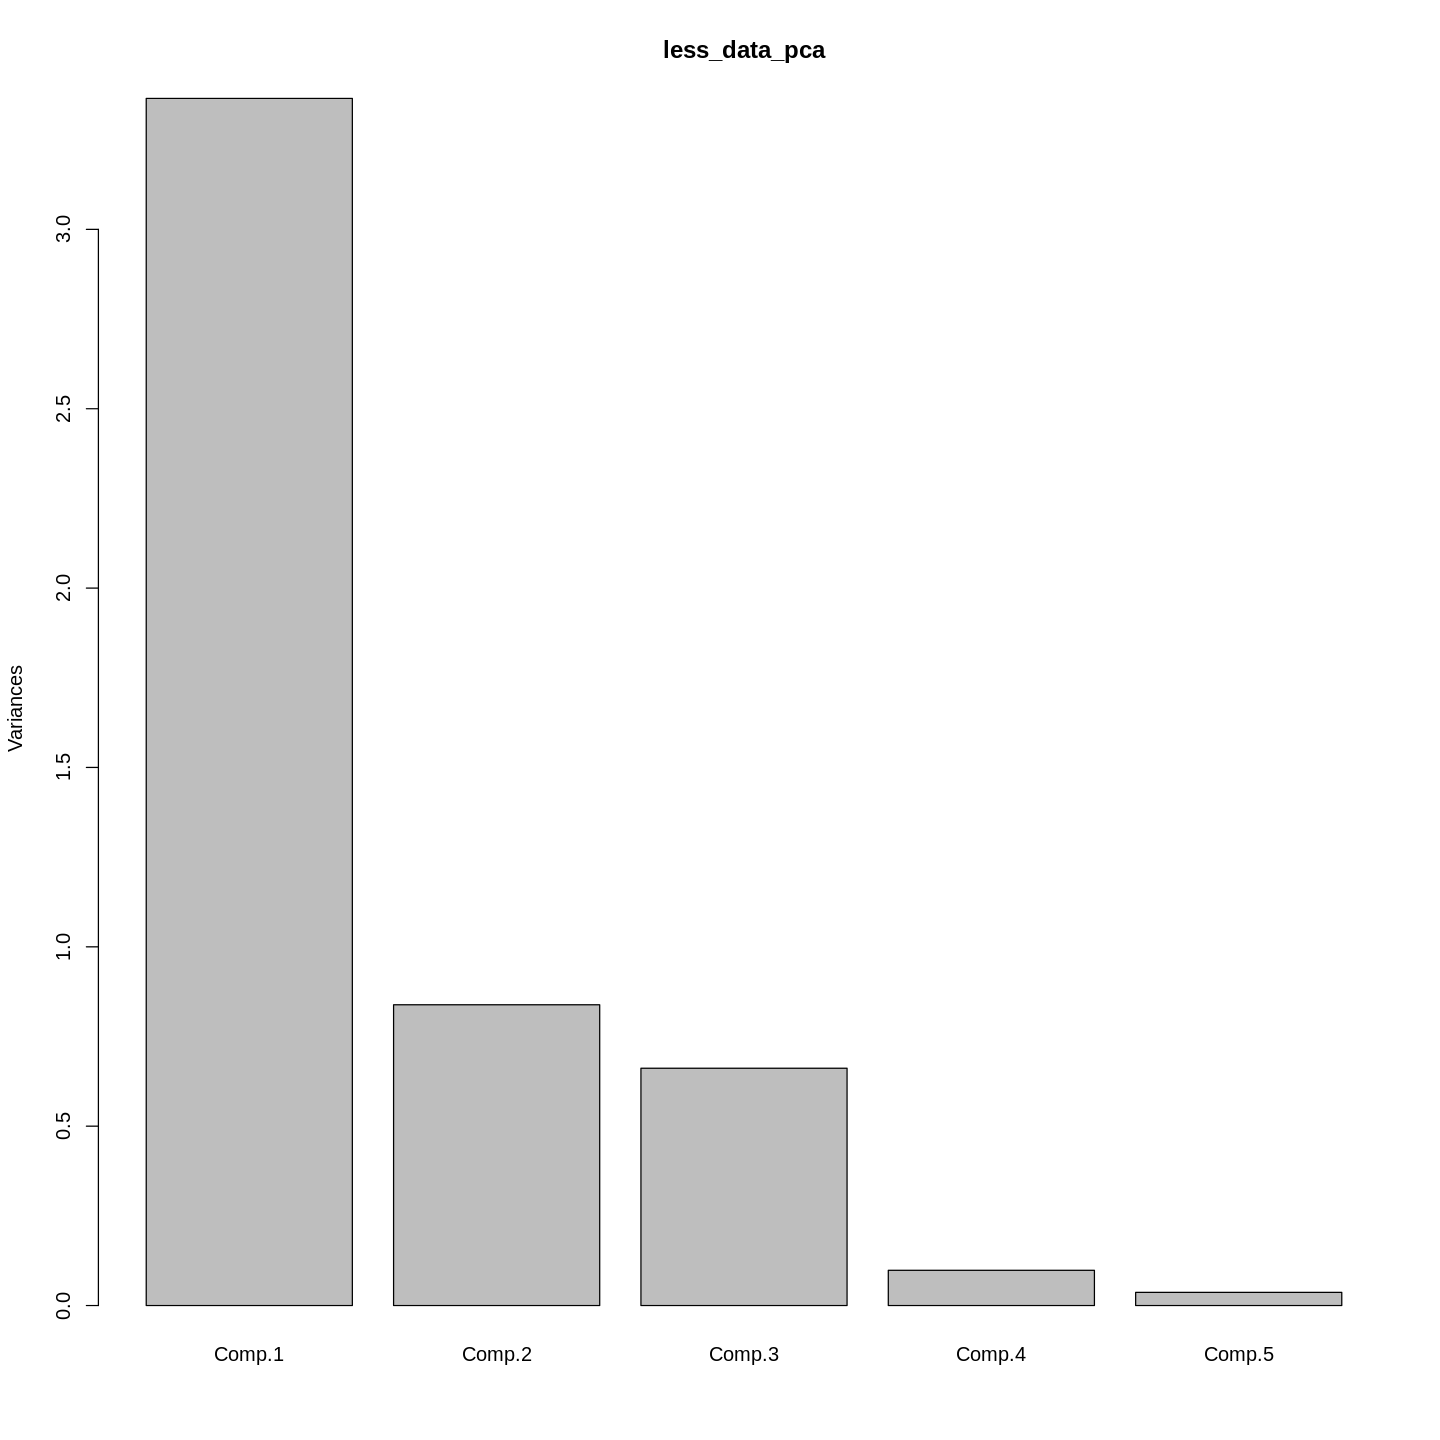

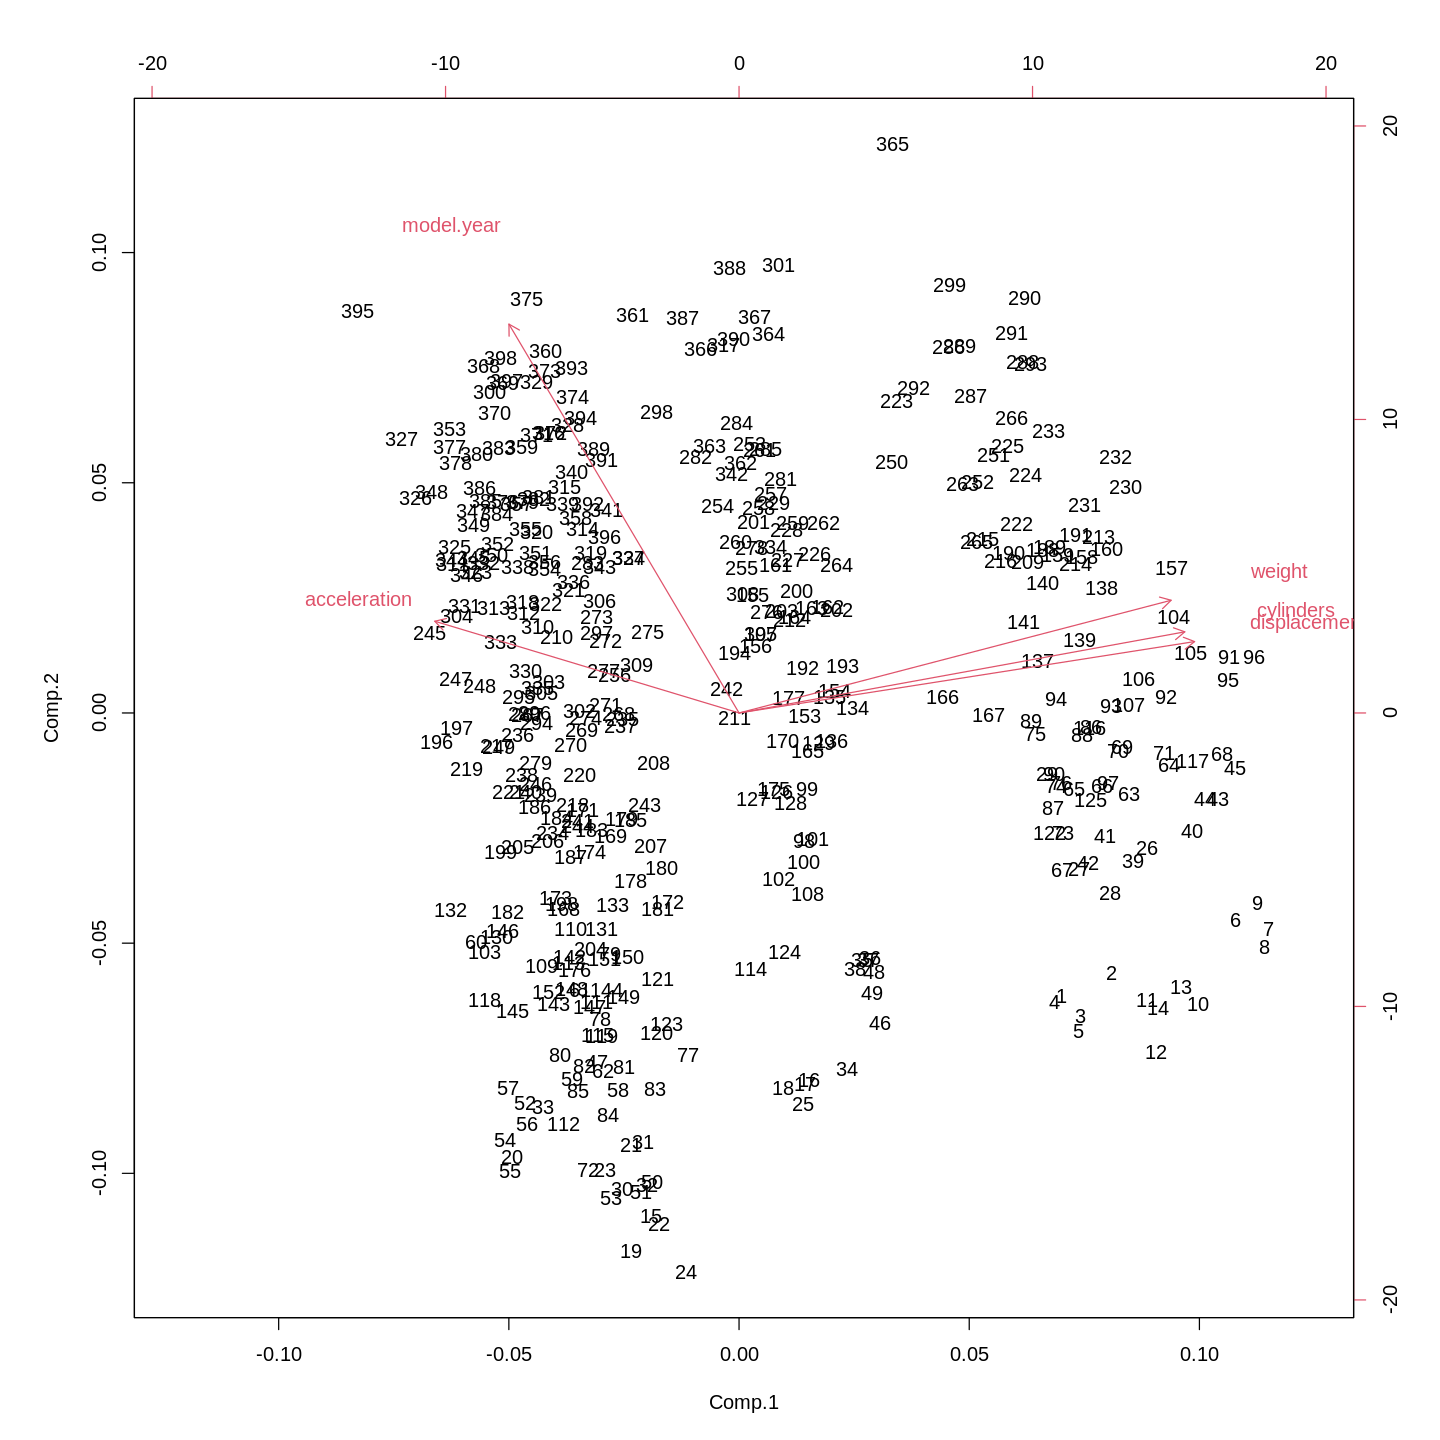

In [11]:
#Code for question 10 goes here
# ------------------------------------
standard_vars <- as.data.frame(scale(less_data))
#dim(standard_vars)
#head(standard_vars)

less_data_pca <- princomp(standard_vars[,-1], cor = TRUE)
summary(less_data_pca)

plot(less_data_pca)
biplot(less_data_pca)

**Question 10.b:** How many principal components are enough to explain 99% of variance in the data?

**Question 11:** Fit a linear regression model to predict mpg using principal component 1 generated above. Name the model as model1.


In [12]:
#Code for question 11 goes here----

model1 = lm(auto_data$mpg ~ less_data_pca$scores[,1])
summary(model1)


Call:
lm(formula = auto_data$mpg ~ less_data_pca$scores[, 1])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5395  -2.9689  -0.1495   2.3918  15.5615 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                23.5146     0.2096  112.20   <2e-16 ***
less_data_pca$scores[, 1]  -3.5971     0.1142  -31.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.181 on 396 degrees of freedom
Multiple R-squared:  0.7146,	Adjusted R-squared:  0.7138 
F-statistic: 991.3 on 1 and 396 DF,  p-value: < 2.2e-16


**Question 12.a:** Fit a linear regression model to predict mpg using principal components 1 and 2 generated above. Name the model as model2.

In [13]:
#Code for question 12 goes here----
model2 = lm(auto_data$mpg ~ less_data_pca$scores[,1] + less_data_pca$scores[,2])
summary(model2)


Call:
lm(formula = auto_data$mpg ~ less_data_pca$scores[, 1] + less_data_pca$scores[, 
    2])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0688  -2.8910  -0.1667   2.5000  14.9574 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                23.5146     0.2039 115.345  < 2e-16 ***
less_data_pca$scores[, 1]  -3.5971     0.1111 -32.368  < 2e-16 ***
less_data_pca$scores[, 2]   1.0796     0.2226   4.849 1.79e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.067 on 395 degrees of freedom
Multiple R-squared:  0.7306,	Adjusted R-squared:  0.7292 
F-statistic: 535.6 on 2 and 395 DF,  p-value: < 2.2e-16


**Question 12.b** Compare model1 and model2 and write few words about your observations on improvement in model accuracy.


**Question 13** Run Factor Analysis on less_data. Can you group variables by factors and interpret? 


In [16]:
# Write your 13 code/answer below this comment
# ------------------------------------
factors_2 <- factanal(less_data, 2, rotation = "varimax")
print(factors_2, digits = 2, cutoff = 0.3, sort = TRUE)

#factors_3 <- factanal(less_data, 3, rotation = "varimax")
#print(factors_3, digits = 2, cutoff = 0.3, sort = TRUE)


Call:
factanal(x = less_data, factors = 2, rotation = "varimax")

Uniquenesses:
         mpg    cylinders displacement       weight acceleration   model.year 
        0.00         0.09         0.00         0.11         0.71         0.63 

Loadings:
             Factor1 Factor2
cylinders     0.89   -0.35  
displacement  0.93   -0.36  
weight        0.83   -0.46  
acceleration -0.52          
mpg          -0.54    0.84  
model.year            0.58  

               Factor1 Factor2
SS loadings       2.93    1.52
Proportion Var    0.49    0.25
Cumulative Var    0.49    0.74

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 106.89 on 4 degrees of freedom.
The p-value is 3.35e-22 


# SAVE YOUR NOTEBOOK!